# Read data from CSV

In [3]:
import sys, os
from pathlib import Path
sys.path.append(str(Path("..")))
from scripts.read_data import read_data

os.makedirs("../generated_charts", exist_ok = True)

data = read_data()
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,6th choice,Animation and Multimedia Design,Daytime,Secondary education,122.0,Portuguese,Basic Ed 3rd Cycle,Other - 11th Year,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),2nd choice,Tourism,Daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year or Eq.,Higher Ed - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,6th choice,Communication Design,Daytime,Secondary education,122.0,Portuguese,Basic Ed 1st Cycle (4th/5th),Basic Ed 1st Cycle (4th/5th),...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,3rd choice,Journalism and Communication,Daytime,Secondary education,122.0,Portuguese,Basic Ed 2nd Cycle (6th–8th),Basic Ed 1st Cycle (4th/5th),...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,2nd choice,Social Service (evening attendance),Evening,Secondary education,100.0,Portuguese,Basic Ed 1st Cycle (4th/5th),Basic Ed 2nd Cycle (6th–8th),...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

TYPE = "histogram"

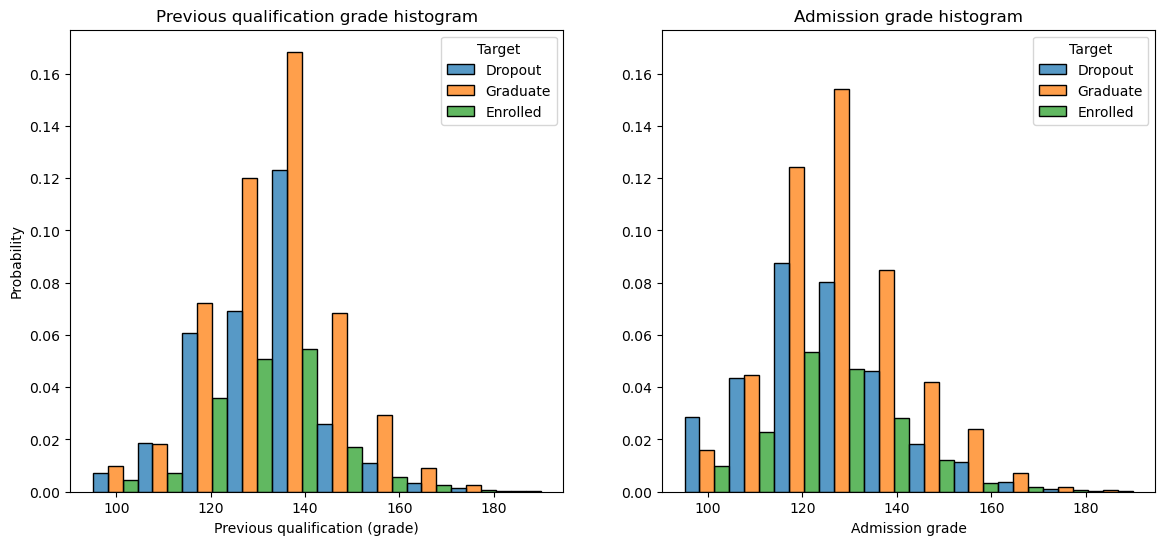

In [5]:
_, axs = plt.subplots(1, 2, figsize=(14, 6), sharey = True)
sns.histplot(data, x = "Previous qualification (grade)", bins = 10, ax = axs[0], hue = "Target", multiple="dodge", stat="probability")
sns.histplot(data, x = "Admission grade", bins = 10, ax = axs[1], hue = "Target", multiple="dodge", stat="probability")
axs[0].set_title("Previous qualification grade histogram")
axs[1].set_title("Admission grade histogram")
axs[1].tick_params(labelleft= True)
plt.savefig(f"../generated_charts/{TYPE}_admission_and_previous_qualification_grades (target).png", dpi = 300, bbox_inches = "tight")
plt.show()

Dropout students are less likely to score more than 120 on the admission score but previous qualification grade didn't imply it

<Figure size 1200x600 with 0 Axes>

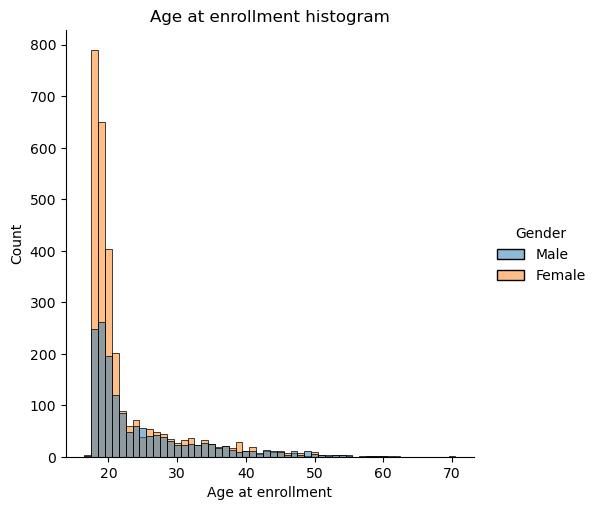

In [6]:
plt.figure(figsize=(12, 6))
sns.displot(data, x = "Age at enrollment", discrete = True, hue = "Gender")
plt.title("Age at enrollment histogram")
plt.savefig(f"../generated_charts/{TYPE}_age1 (gender).png", dpi = 300, bbox_inches = "tight")
plt.show()

<Figure size 1200x600 with 0 Axes>

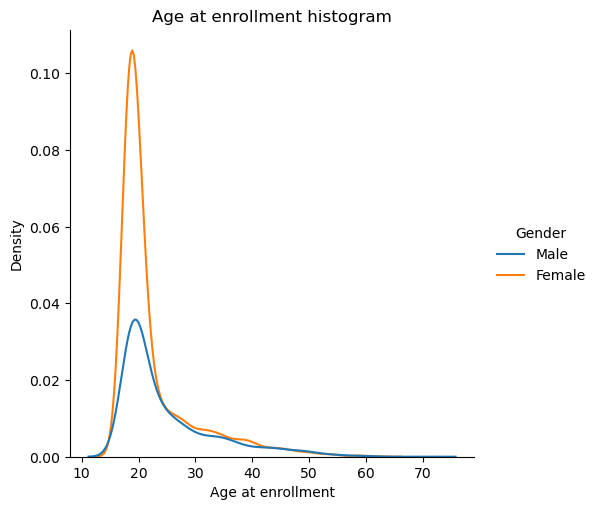

In [7]:
plt.figure(figsize=(12, 6))
sns.displot(data, x = "Age at enrollment", hue = "Gender", kind = "kde")
plt.title("Age at enrollment histogram")
plt.savefig(f"../generated_charts/{TYPE}_age2 (gender).png", dpi = 300, bbox_inches = "tight")
plt.show()

More women take academic route, especially young women

<Figure size 600x600 with 0 Axes>

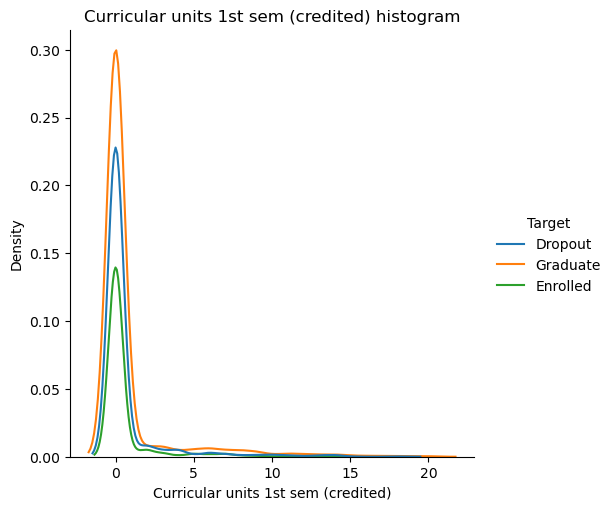

<Figure size 600x600 with 0 Axes>

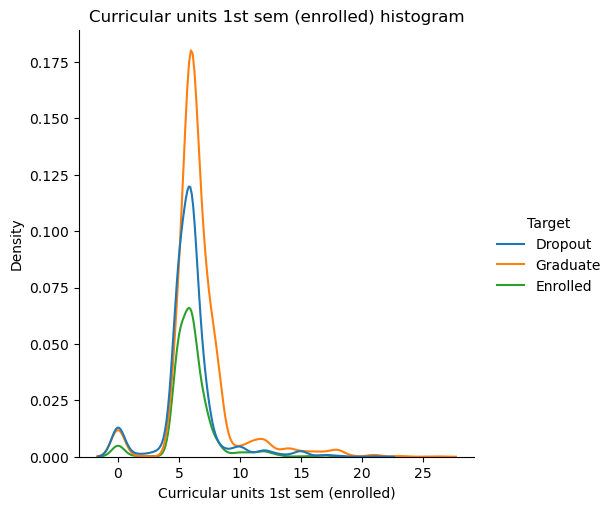

<Figure size 600x600 with 0 Axes>

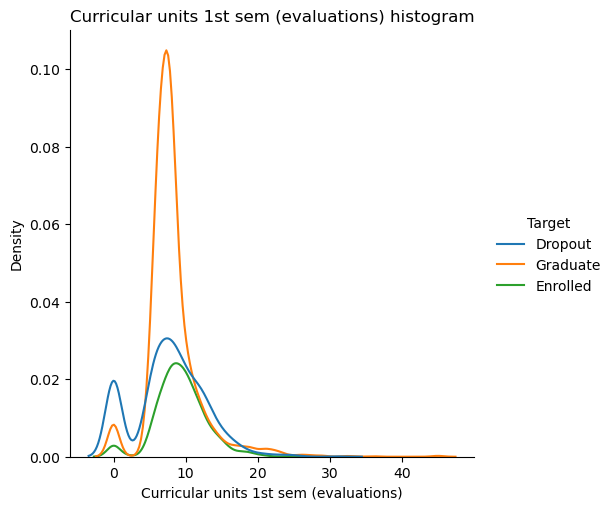

<Figure size 600x600 with 0 Axes>

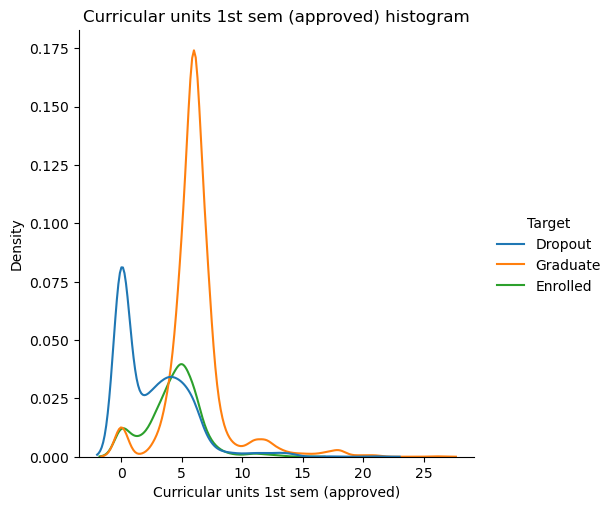

<Figure size 600x600 with 0 Axes>

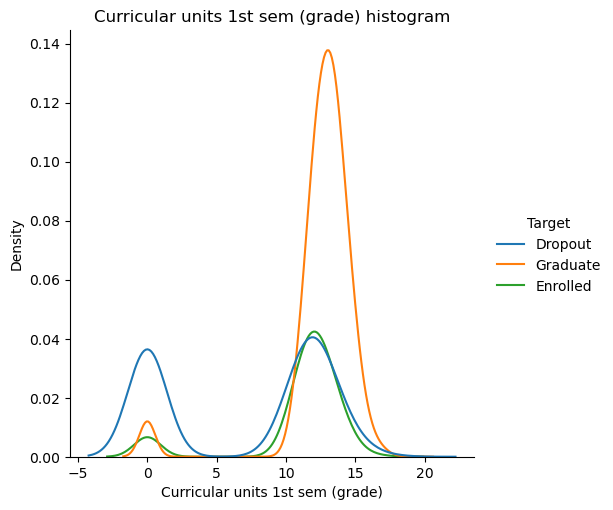

In [8]:
from scripts.consts import SEM_1ST_COLUMN_NAMES
import re

for column_name in SEM_1ST_COLUMN_NAMES:

    plt.figure(figsize=(6, 6))
    sns.displot(data, x = column_name, hue = "Target", kind = "kde")
    plt.title(f"{column_name} histogram")
    plt.savefig(f"../generated_charts/{TYPE}_{re.search(r'\((.*?)\)', column_name).group(1)}_1st (target).png", dpi = 300, bbox_inches = "tight")
    plt.show()

* Dropout students are more likely to get evaluation close to zero in the 1st semester
* Dropout students don't get approve much more ofter in the 1st semester
* Dropout student are more likely to get grade 0 in the 1st semester

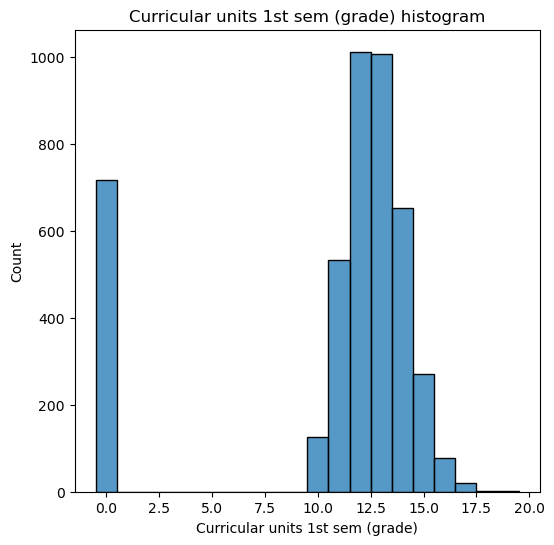

In [9]:
plt.figure(figsize=(6, 6))
sns.histplot(data["Curricular units 1st sem (grade)"], discrete = True)
plt.title("Curricular units 1st sem (grade) histogram")
plt.savefig(f"../generated_charts/{TYPE}_grade_1st.png", dpi = 300, bbox_inches = "tight")
plt.show()

* Students' grades in the 1st semester are either 10+ or 0

<Figure size 600x600 with 0 Axes>

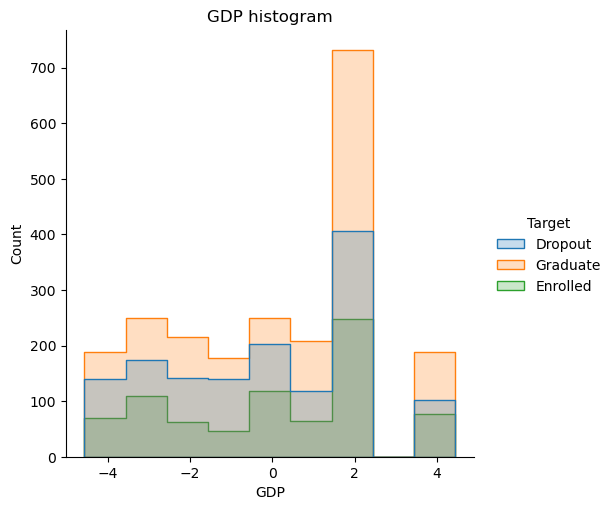

In [10]:
plt.figure(figsize=(6, 6))
sns.displot(data, x="GDP", hue = "Target", discrete = True, element="step")
plt.title("GDP histogram")
plt.savefig(f"../generated_charts/{TYPE}_GDP (target).png", dpi = 300, bbox_inches = "tight")
plt.show()

<Figure size 600x600 with 0 Axes>

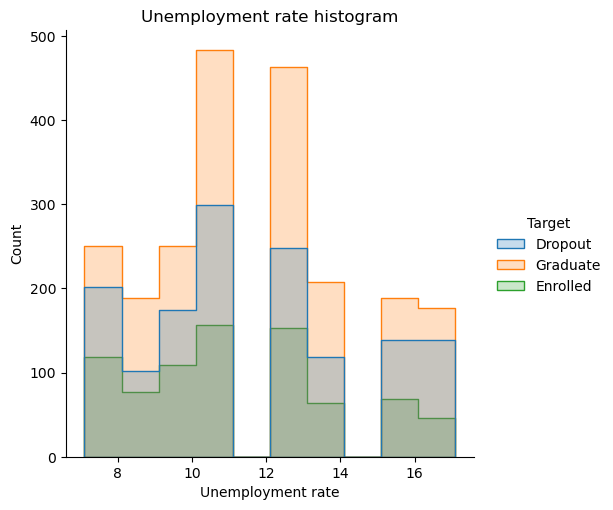

In [11]:
plt.figure(figsize=(6, 6))
sns.displot(data, x="Unemployment rate", hue = "Target", discrete = True, element="step")
plt.title("Unemployment rate histogram")
plt.savefig(f"../generated_charts/{TYPE}_unemployment (target).png", dpi = 300, bbox_inches = "tight")
plt.show()

<Figure size 600x600 with 0 Axes>

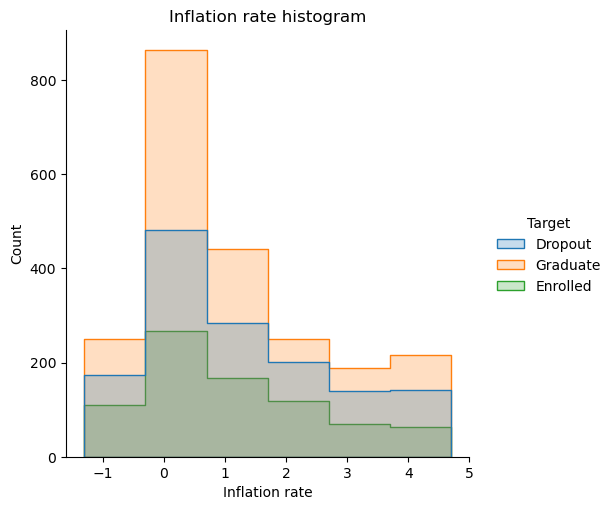

In [12]:
plt.figure(figsize=(6, 6))
sns.displot(data, x="Inflation rate", hue = "Target", discrete = True, element="step")
plt.title("Inflation rate histogram")
plt.savefig(f"../generated_charts/{TYPE}_inflation (target).png", dpi = 300, bbox_inches = "tight")
plt.show()

More student's who will dropout enroll when GDP is getting lower

<Figure size 600x600 with 0 Axes>

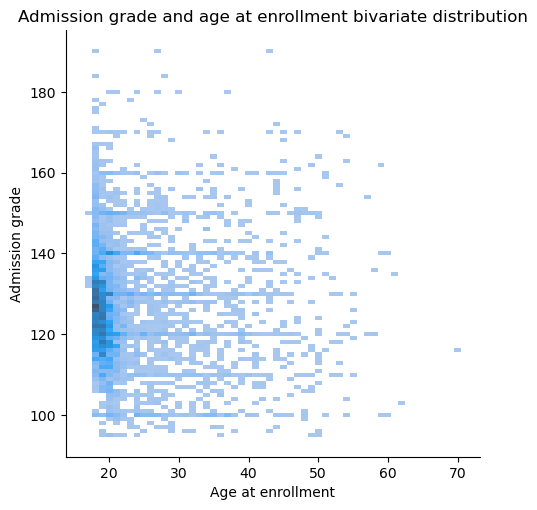

d:\dev\Anaconda\envs\msid_project1\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'discrete'
  cset = contour_func(


<Figure size 600x600 with 0 Axes>

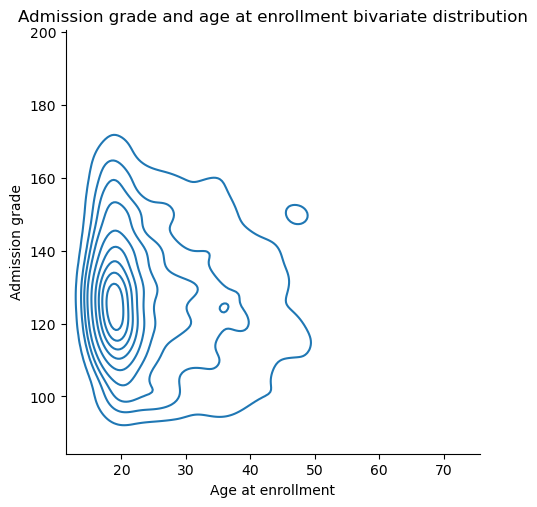

In [13]:
plt.figure(figsize=(6, 6))
sns.displot(data, x="Age at enrollment", y="Admission grade", discrete = True)
plt.title("Admission grade and age at enrollment bivariate distribution")
plt.savefig(f"../generated_charts/{TYPE}_bivariate_admission_grade_vs_age1.png", dpi = 300, bbox_inches = "tight")
plt.show()

plt.figure(figsize=(6, 6))
sns.displot(data, x="Age at enrollment", y="Admission grade", discrete = True, kind = "kde")
plt.title("Admission grade and age at enrollment bivariate distribution")
plt.savefig(f"../generated_charts/{TYPE}_bivariate_admission_grade_vs_age2.png", dpi = 300, bbox_inches = "tight")
plt.show()

<Figure size 600x600 with 0 Axes>

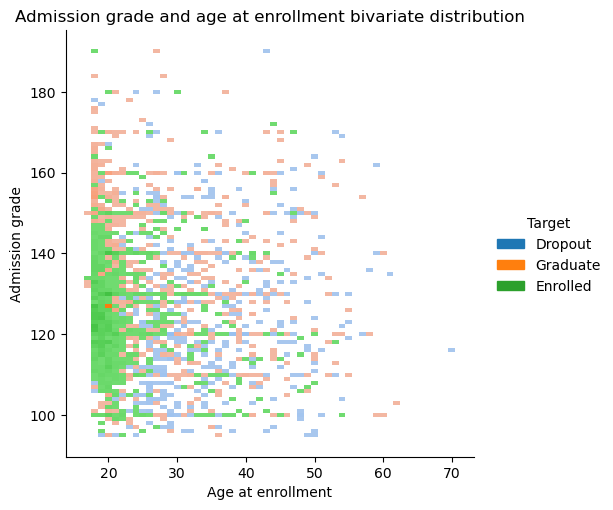

In [14]:
plt.figure(figsize=(6, 6))
sns.displot(data, x="Age at enrollment", y="Admission grade", hue = "Target", discrete = True)
plt.title("Admission grade and age at enrollment bivariate distribution")
plt.savefig(f"../generated_charts/{TYPE}_bivariate_admission_grade_vs_age (target).png", dpi = 300, bbox_inches = "tight")
plt.show()

d:\dev\Anaconda\envs\msid_project1\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'discrete'
  cset = contour_func(


<Figure size 600x600 with 0 Axes>

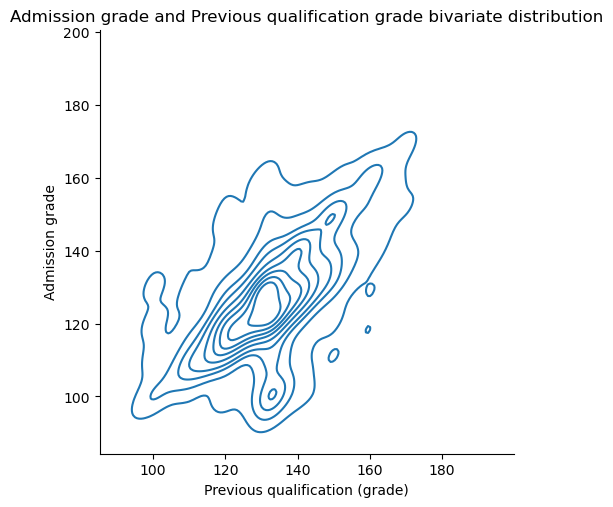

In [15]:
plt.figure(figsize=(6, 6))
sns.displot(data, x="Previous qualification (grade)", y="Admission grade", discrete = True, kind = "kde")
plt.title("Admission grade and Previous qualification grade bivariate distribution")
plt.savefig(f"../generated_charts/{TYPE}_bivariate_admission_grade_vs_previous_qualification_grade.png", dpi = 300, bbox_inches = "tight")
plt.show()

<Figure size 600x600 with 0 Axes>

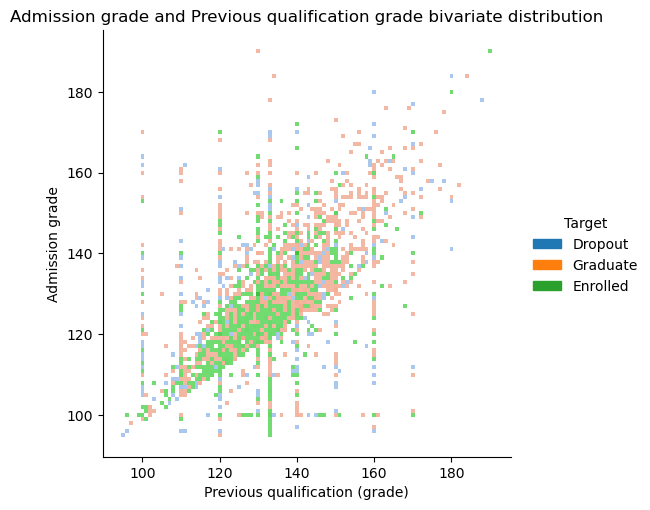

In [16]:
plt.figure(figsize=(6, 6))
sns.displot(data, x="Previous qualification (grade)", y="Admission grade", hue = "Target", discrete = True,)
plt.title("Admission grade and Previous qualification grade bivariate distribution")
plt.savefig(f"../generated_charts/{TYPE}_bivariate_admission_grade_vs_previous_qualification_grade (target).png", dpi = 300, bbox_inches = "tight")
plt.show()